<a href="https://colab.research.google.com/github/reypapin/Domain-Name-Classification-with-Contextual-Learning/blob/main/Code/Python/Noteboks/ollama_Llama3_8B_prompting_n_size_family1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ollama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! sudo apt-get install -y pciutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pci.ids all 0.0~2022.01.22-1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 2s (140 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initializ

In [4]:
! curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0>>> Downloading ollama...
100 10091    0 10091    0     0  23686      0 --:--:-- --:--:-- --:--:-- 23687
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [5]:
import os
import threading
import subprocess
import requests
import json

def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

In [6]:
ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

In [7]:
! ollama run llama3

pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠏ pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   

In [8]:
ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

In [9]:
import pandas as pd
import requests
import json

# File paths
dga_test_file = "/content/drive/My Drive/df_dga_test.csv"
normal_test_file = "/content/drive/My Drive/df_normal_test.csv"
dga_train_file = "/content/drive/My Drive/df_dga_train.csv"
normal_train_file = "/content/drive/My Drive/df_normal_train.csv"

# Load CSV files into dataframes
df_dga_test1 = pd.read_csv(dga_test_file)
df_dga_test = df_dga_test1[df_dga_test1['family'] == 'fobber']
df_dga_test_limited = df_dga_test.head(500)  # Remember are 54 family

df_normal_test = pd.read_csv(normal_test_file, nrows=500)

df_dga_train1 = pd.read_csv(dga_train_file)
df_dga_train = df_dga_train1[df_dga_train1['family'] != 'fobber']
df_normal_train = pd.read_csv(normal_train_file)

In [10]:
import requests
import json

def classify_domain(domain, df, url='http://localhost:11434/api/chat'):

    # Create the introductory statement
    intro = (
        "You are a domain name classification system. Your task is to classify domain names as either 'dga' (Domain Generation Algorithm) or 'normal'. "
        "DGA domains are automatically generated by malware, while normal domains are not. "
        "I will provide you with labeled training data containing domain names and their classifications. "
        "After the training phase, you will classify a new domain and respond with either 'dga' or 'normal'. \n\n "

    )

    # Add labeled examples from the DataFrame
    prompt = intro
    for _, row in df.iterrows():
        label = "dga" if row['labels'] == 1 else "normal"
        prompt += f"{row['domain']}\n{{ 'domain': '{row['domain']}', 'result': '{label}' }}\n\n"

    # Add the new domain to classify
    prompt += f"{{ 'Now you classify this domain': '{domain}', 'only answer dga or normal, Do not provide any additional information or explanation ': "

    # Send the prompt to the model
    question = prompt + "}}"



    payload = {
        "model": "llama3",
        "temperature": 0.6,
        "stream": False,
        "messages": [
            {"role": "system", "content": "You are an AI assistant!"},
            {"role": "user", "content": question}
        ]
    }
    response = requests.post(url, json=payload)
    message_str = response.content.decode('utf-8')
    message_dict = json.loads(message_str)
    return message_dict['message']['content']

"""
# Example usage
domains = ["as.com", "youtube.com"]
for domain in domains:
    print(f"Domain: {domain}, Response: {classify_domain(domain, train_df)}")
"""


'\n# Example usage\ndomains = ["as.com", "youtube.com"]\nfor domain in domains:\n    print(f"Domain: {domain}, Response: {classify_domain(domain, train_df)}")\n'

In [11]:
# Function to create and shuffle datasets
def create_datasets(dga_train_size, normal_train_size):
    dga_train_size = dga_train_size/50
    df_dga_train_limited = df_dga_train.groupby('family').head(dga_train_size)
    df_normal_train_limited = df_normal_train.head(normal_train_size)

    train_df = pd.concat([df_dga_train_limited, df_normal_train_limited])
    train_df['labels'] = train_df['domain'].apply(lambda x: 0 if x in df_normal_train_limited['domain'].values else 1)


    test_df = pd.concat([df_dga_test_limited, df_normal_test])
    test_df['labels'] = test_df['domain'].apply(lambda x: 0 if x in df_normal_test['domain'].values else 1)

    train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
    test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

    return train_df, test_df

# Test with different sizes of training data
training_sizes = [500, 1000, 1500]

for size in training_sizes:
    dga_train_size = size // 2
    normal_train_size = size // 2
    train_df, test_df = create_datasets(dga_train_size, normal_train_size)

    # Save train and test datasets for reference
    train_file = f'/content/drive/My Drive/train_{size}.csv'
    test_file = f'/content/drive/My Drive/test_{size}.csv'
    train_df.to_csv(train_file, index=False)
    test_df.to_csv(test_file, index=False)

    # Example usage with classification
    print(f"Testing with training size: {size}")
    domains = ["as.com", "youtube.com"]
    for domain in domains:
        print(f"Domain: {domain}, Response: {classify_domain(domain, train_df)}")

    # Apply classify_domain function to each domain in test_df and store the results in a new column
    test_df['classification'] = test_df['domain'].apply(lambda domain: classify_domain(domain, train_df))

    # Save the classification results
    test_results_file = f'/content/drive/My Drive/test_results_{size}.csv'
    test_df.to_csv(test_results_file, index=False)

    print(f"Test results saved to {test_results_file}")

Testing with training size: 500
Domain: as.com, Response: { 'domain': 'as.com', 'result': 'normal' }
Domain: youtube.com, Response: {'domain': 'youtube.com', 'result': 'normal'}
Test results saved to /content/drive/My Drive/test_results_500.csv
Testing with training size: 1000
Domain: as.com, Response: { 'domain': 'as.com', 'result': 'normal' }
Domain: youtube.com, Response: {'domain': 'youtube. com', 'result': 'normal'}
Test results saved to /content/drive/My Drive/test_results_1000.csv
Testing with training size: 1500
Domain: as.com, Response: {  'domain':  'as.com',  'result':  'normal'  }
Domain: youtube.com, Response: {'domain': 'youtube.com', 'result': 'normal'}
Test results saved to /content/drive/My Drive/test_results_1500.csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classification Report for Training Size 500:
               precision    recall  f1-score   support

           0       1.00      0.53      0.70       500
           1       0.44      1.00      0.61       186

    accuracy                           0.66       686
   macro avg       0.72      0.77      0.66       686
weighted avg       0.85      0.66      0.67       686

Confusion Matrix for Training Size 500:
 [[267 233]
 [  0 186]]
Classification Report for Training Size 1000:
               precision    recall  f1-score   support

           0       1.00      0.55      0.71       500
           1       0.45      1.00      0.63       186

    accuracy                           0.67       686
   macro avg       0.73      0.78      0.67       686
weighted avg       0.85      0.67      0.69       686

Confusion Matrix for Training Size 1000:
 [[277 223]
 [  0 1

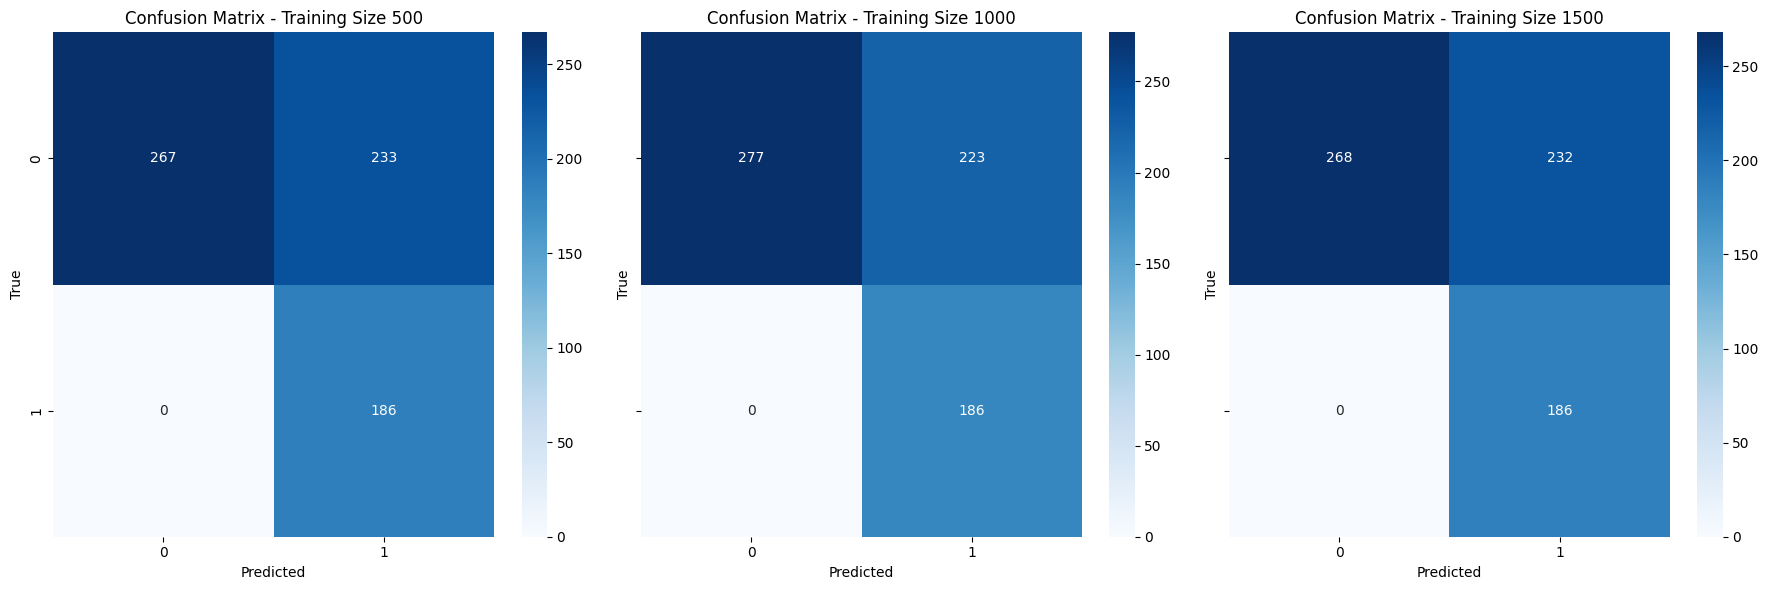

In [12]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import re

# Montar Google Drive
drive.mount('/content/drive')

# Definir los tamaños de las muestras
training_sizes = [500, 1000, 1500]

# Función para convertir las clasificaciones a 1 o 0
def convert_classification(row):
    # Convert the row to lowercase to ensure case-insensitive matching
    row = row.lower()

    # Use regular expressions to find exact matches for 'normal' and 'dga'
    if re.search(r'\bnormal\b', row):
        if re.search(r'\bdga\b', row):
            # Handle cases where both 'normal' and 'dga' appear in the response
            if row.index('normal') < row.index('dga'):
                return 0  # Assume the first occurrence is more likely the intended classification
            else:
                return 1
        return 0
    elif re.search(r'\bdga\b', row):
        return 1
    else:
        # Handle unexpected cases, you might want to log these for further analysis
        print(f"Unexpected response format: {row}")
        return -1  # Or handle in a way appropriate to your use case

# Listas para almacenar los resultados
reports = []
confusion_matrices = []

for size in training_sizes:
    # Cargar los archivos CSV de Google Drive
    test_file = f'/content/drive/My Drive/test_{size}.csv'
    test_results_file = f'/content/drive/My Drive/test_results_{size}.csv'

    test_df = pd.read_csv(test_file)
    test_results_df = pd.read_csv(test_results_file)

    # Convertir la columna de clasificación a 1 o 0
    test_results_df['classification'] = test_results_df['classification'].apply(convert_classification)

    # Calcular las métricas de evaluación
    y_true = test_results_df['labels']
    y_pred = test_results_df['classification']

    # Filtrar cualquier fila con clasificaciones inesperadas (-1)
    valid_indices = y_pred != -1
    y_true = y_true[valid_indices]
    y_pred = y_pred[valid_indices]

    report = classification_report(y_true, y_pred, output_dict=True)
    confusion_matrix_result = confusion_matrix(y_true, y_pred)

    reports.append(report)
    confusion_matrices.append(confusion_matrix_result)

    print(f"Classification Report for Training Size {size}:\n", classification_report(y_true, y_pred))
    print(f"Confusion Matrix for Training Size {size}:\n", confusion_matrix_result)

# Visualizar los resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, size in enumerate(training_sizes):
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix - Training Size {size}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()
